In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("C://Users//shrad//OneDrive//Desktop//Python Practice jupyter notebook//UNZIP_FOR_NOTEBOOKS_FINAL//DATA//gene_expression.csv")

In [5]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


In [7]:
df.describe()

,Gene One,Gene Two,Cancer Present
count,3000.000000,3000.000000,3000.000000
mean,5.600133,5.410467,0.500000
std,1.828388,1.729081,0.500083
min,1.000000,1.000000,0.000000
25%,4.300000,4.000000,0.000000
50%,5.600000,5.400000,0.500000
75%,6.900000,6.700000,1.000000
max,10.000000,10.000000,1.000000


<AxesSubplot:xlabel='Cancer Present', ylabel='count'>

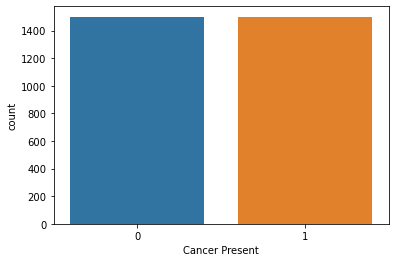

In [9]:
sns.countplot(x='Cancer Present',data=df)

<AxesSubplot:>

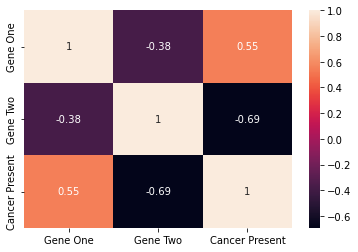

In [12]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='Gene Two', ylabel='Gene One'>

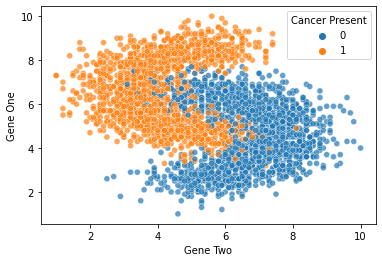

In [15]:
sns.scatterplot(x='Gene Two',y='Gene One',hue='Cancer Present',data=df,alpha=0.7)

Scaling of data is required for KNN 

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [19]:
X=df.drop('Cancer Present',axis=1)
y=df['Cancer Present']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [21]:
scaler=StandardScaler()

In [22]:
X_train=scaler.fit_transform(X_train)

In [23]:
X_test=scaler.transform(X_test)

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
knn_model=KNeighborsClassifier(n_neighbors=3)

In [28]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [30]:
pred=knn_model.predict(X_test)

In [38]:
from sklearn.metrics import plot_confusion_matrix,plot_roc_curve,plot_precision_recall_curve,classification_report,confusion_matrix,accuracy_score

In [33]:
confusion_matrix(y_test,pred)

array([[437,  33],
       [ 33, 397]], dtype=int64)

C:\Users\shrad\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


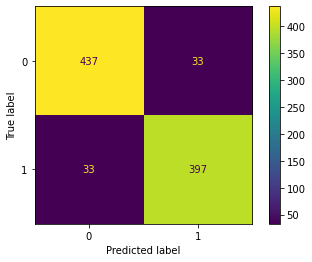

In [34]:
plot_confusion_matrix(knn_model,X_test,y_test)

C:\Users\shrad\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


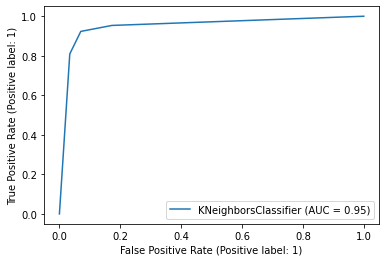

In [35]:
plot_roc_curve(knn_model,X_test,y_test)

In [36]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       470
           1       0.92      0.92      0.92       430

    accuracy                           0.93       900
   macro avg       0.93      0.93      0.93       900
weighted avg       0.93      0.93      0.93       900



## Elbow Method for Choosing Reasonable K Values


**NOTE: This uses the test set for the hyperparameter selection of K.**

In [39]:
accuracy_score(y_test,pred)

0.9266666666666666

In [46]:
test_error_rate=[]

for k in range(1,30):
    knn_model=KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train,y_train)
    
    pred=knn_model.predict(X_test)
    
    test_error=1-accuracy_score(y_test,pred)
    test_error_rate.append(test_error)

<AxesSubplot:>

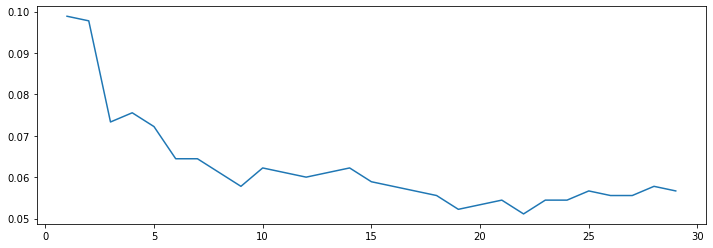

In [51]:
plt.figure(figsize=(12,4))
sns.lineplot(x=range(1,30),y=test_error_rate)

## Full Cross Validation Grid Search for K Value
# Creating a Pipeline to find K value
Follow along very carefully here! We use very specific string codes AND variable names here so that everything matches up correctly. This is not a case where you can easily swap out variable names for whatever you want!

## We'll use a Pipeline object to set up a workflow of operations:

Scale Data
Create Model on Scaled Data
How does the Scaler work inside a Pipeline with CV? Is scikit-learn "smart" enough to understand .fit() on train vs .transform() on train and test?*

*Yes! Scikit-Learn's pipeline is well suited for this! Full Info in Documentation *

When you use the StandardScaler as a step inside a Pipeline then scikit-learn will internally do the job for you.

What happens can be discribed as follows:

Step 0: The data are split into TRAINING data and TEST data according to the cv parameter that you specified in the GridSearchCV.

Step 1: the scaler is fitted on the TRAINING data

Step 2: the scaler transforms TRAINING data

Step 3: the models are fitted/trained using the transformed TRAINING data

Step 4: the scaler is used to transform the TEST data

Step 5: the trained models predict using the transformed TEST data


In [52]:
scaler=StandardScaler()

In [53]:
knn=KNeighborsClassifier()

In [56]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [61]:
operations=[('scaler',scaler),('knn',knn)]

In [57]:
from sklearn.pipeline import Pipeline

In [62]:
pipe=Pipeline(operations)

In [65]:
from sklearn.model_selection import GridSearchCV

In [69]:
k_values=list(range(1,20))
k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [71]:
param_grid={'knn__n_neighbors':k_values}

## Note: If your parameter grid is going inside a PipeLine, your parameter name needs to be specified in the following manner:*

chosen_string_name + two underscores + parameter key name

model_name + __ + parameter name

knn_model + __ + n_neighbors

knn_model__n_neighbors

StackOverflow on this

The reason we have to do this is because it let's scikit-learn know what operation in the pipeline these parameters are related to (otherwise it might think n_neighbors was a parameter in the scaler)

In [72]:
full_cv_classifier=GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')

In [73]:
full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [74]:
full_cv_classifier.best_params_

{'knn__n_neighbors': 16}

In [75]:
full_cv_classifier.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=16))])

In [78]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=16))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=16),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 16,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [80]:
full_pred=full_cv_classifier.predict(X_test)

In [81]:
print(classification_report(y_test,full_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       470
           1       0.95      0.93      0.94       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



C:\Users\shrad\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


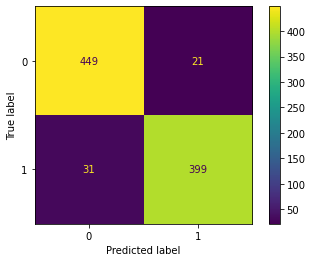

In [82]:
plot_confusion_matrix(full_cv_classifier,X_test,y_test)

In [83]:
accuracy_score(y_test,full_pred)

0.9422222222222222